In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten, LSTM
import warnings
warnings.filterwarnings('ignore')
from collections import Counter



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/CPT_II_ConnersContinuousPerformanceTest.csv'
df = pd.read_csv(file_path, delimiter=';')
df.head()


,ID,Assessment Status,Assessment Duration,Type,LastTrial,Trial1,Response1,Trial2,Response2,Trial3,...,Raw Score HitRTIsi,Percent HitRTIsi,General TScore HitSEIsi,Adhd TScore HitSEIsi,Neuro TScore HitSEIsi,Raw Score HitSEIsi,Percent HitSEIsi,Adhd Confidence Index,Neuro Confidence Index,Old Overall Index
0,2,3,839999,6,360,11,-1,13,469,7,...,0.049592,0,48.021103,47.772537,43.224297,-0.021096,0,61.145496,58.749630,10.070000
1,3,3,839999,6,360,12,-1,0,371,2,...,0.064090,0,42.234097,38.263283,41.574574,-0.077351,0,86.871597,61.088688,4.440000
2,4,3,839999,6,360,14,-1,10,-1,3,...,0.077233,0,45.680782,42.289310,43.868061,-0.046142,0,99.900002,86.131813,18.340000
3,5,3,839999,6,360,12,459,7,289,12,...,0.085540,0,85.698700,70.469986,80.228539,0.410634,0,99.900002,99.900002,8.950001
4,7,3,839998,6,360,11,841,7,-1,5,...,0.024632,0,42.058998,43.349667,39.992119,-0.071200,0,32.291084,24.225414,0.000000


In [ ]:
df.isna().sum()

,0
ID,0
Assessment Status,0
Assessment Duration,0
Type,0
LastTrial,0
...,...
Raw Score HitSEIsi,0
Percent HitSEIsi,0
Adhd Confidence Index,0
Neuro Confidence Index,0


In [ ]:
df.isna().sum().sum()

np.int64(0)

In [ ]:
# Define target variable (ADHD Confidence Index as binary classification)
df['ADHD_Diagnosis'] = (df['Adhd Confidence Index'] > 50).astype(int)  # 1 = ADHD, 0 = No ADHD



In [ ]:
# Drop non-relevant columns (ID and categorical variables if any)
features_to_drop = ['ID', 'Adhd Confidence Index', 'ADHD_Diagnosis']
X = df.drop(columns=features_to_drop, errors='ignore')
y = df['ADHD_Diagnosis']


# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
def plot_misclassification_frequency(y_true, y_pred, model_name):
    incorrect_mask = y_true != y_pred
    incorrect_labels = y_true[incorrect_mask]
    predicted_labels = y_pred[incorrect_mask]

    misclassified = [f"Actual {a} → Pred {p}" for a, p in zip(incorrect_labels, predicted_labels)]
    count = Counter(misclassified)
    freq_df = pd.DataFrame(count.items(), columns=["Misclassification Type", "Frequency"])
    freq_df.sort_values("Frequency", ascending=False, inplace=True)

    plt.figure(figsize=(10, 5))
    sns.barplot(data=freq_df, x="Misclassification Type", y="Frequency", palette="pastel")
    plt.title(f"Frequency of Misclassifications: {model_name}", fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True, axis='y')
    plt.show()


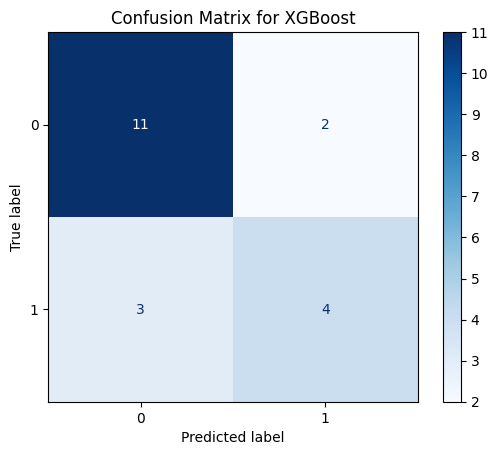

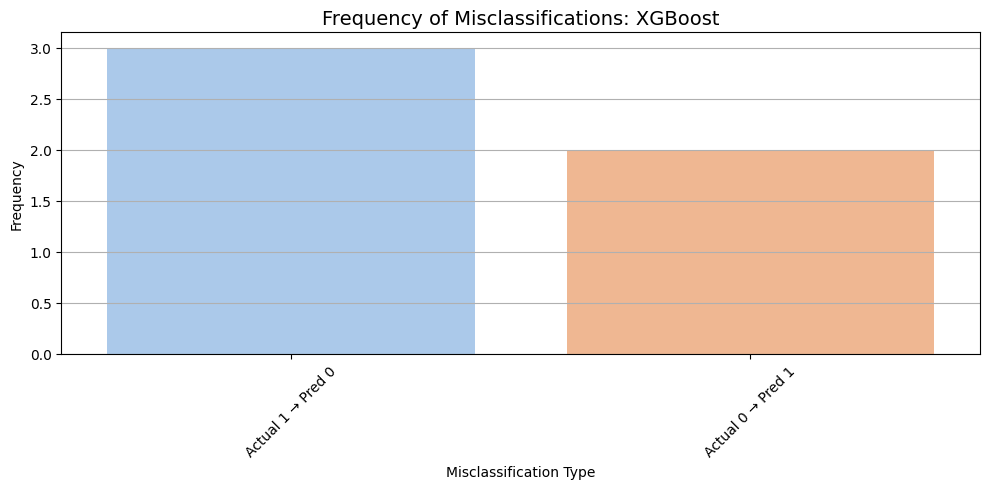


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.67      0.57      0.62         7

    accuracy                           0.75        20
   macro avg       0.73      0.71      0.72        20
weighted avg       0.74      0.75      0.75        20

[LightGBM] [Info] Number of positive: 35, number of negative: 44
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 79, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.443038 -> initscore=-0.228842
[LightGBM] [Info] Start training from score -0.228842
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

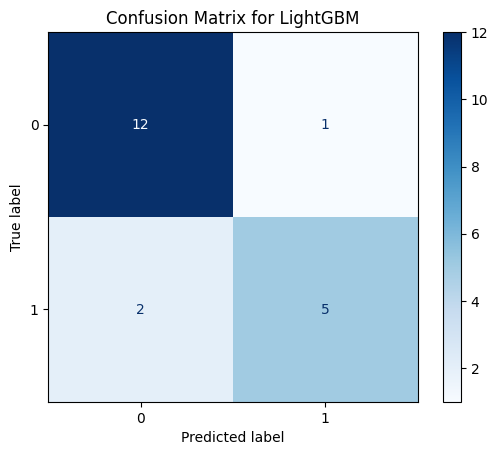

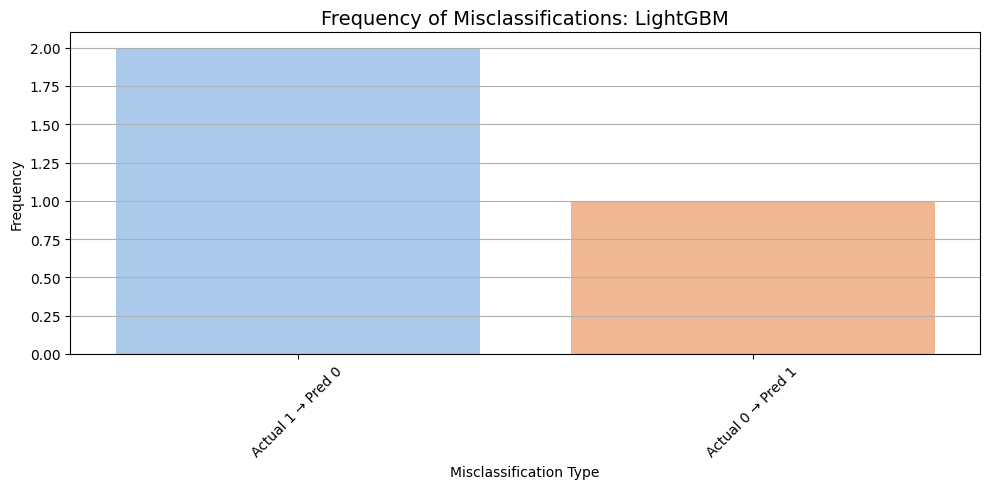


Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.83      0.71      0.77         7

    accuracy                           0.85        20
   macro avg       0.85      0.82      0.83        20
weighted avg       0.85      0.85      0.85        20



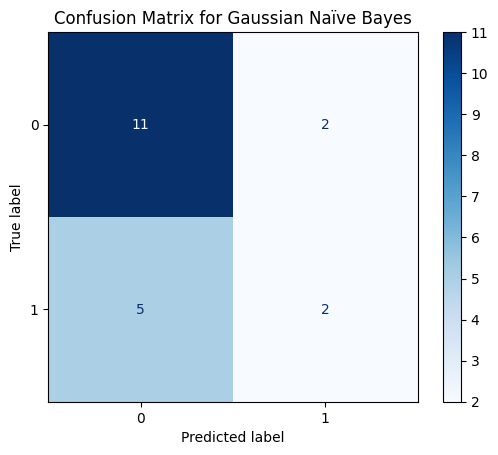

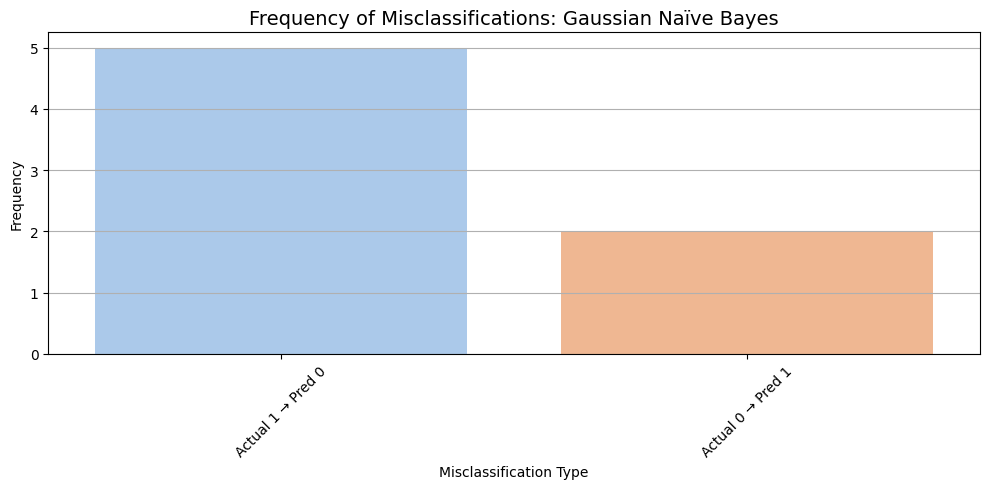


Classification Report for Gaussian Naïve Bayes:
              precision    recall  f1-score   support

           0       0.69      0.85      0.76        13
           1       0.50      0.29      0.36         7

    accuracy                           0.65        20
   macro avg       0.59      0.57      0.56        20
weighted avg       0.62      0.65      0.62        20

                  Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0               XGBoost      0.75   0.666667  0.571429  0.615385  0.912088
1              LightGBM      0.85   0.833333  0.714286  0.769231  0.879121
2  Gaussian Naïve Bayes      0.65   0.500000  0.285714  0.363636  0.813187


In [ ]:
# Initialize models
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "Gaussian Naïve Bayes": GaussianNB()
}

# Train and evaluate models
results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Confusion matrix and misclassification plot
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

    plot_misclassification_frequency(y_test, y_pred, model_name)

    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    })


# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 266ms/step - accuracy: 0.4636 - loss: 0.7030 - val_accuracy: 0.7500 - val_loss: 0.5941
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.8631 - loss: 0.5879 - val_accuracy: 0.7500 - val_loss: 0.5220
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8633 - loss: 0.5084 - val_accuracy: 0.7500 - val_loss: 0.4776
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.8945 - loss: 0.4671 - val_accuracy: 0.7500 - val_loss: 0.4481
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.8424 - loss: 0.4276 - val_accuracy: 0.7500 - val_loss: 0.4261
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.8525 - loss: 0.3885 - val_accuracy: 0.7500 - val_loss: 0.4066
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.8633 - loss: 0.3863 - val_accuracy: 0.7500 - val_loss: 0.3910
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.8527 - loss: 0.3791 - val_accuracy: 0.7500 - val_loss: 0.3

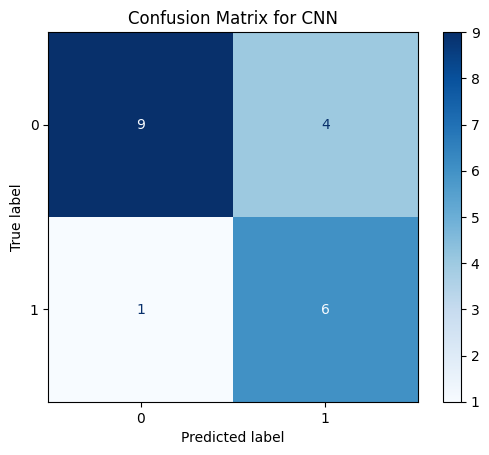

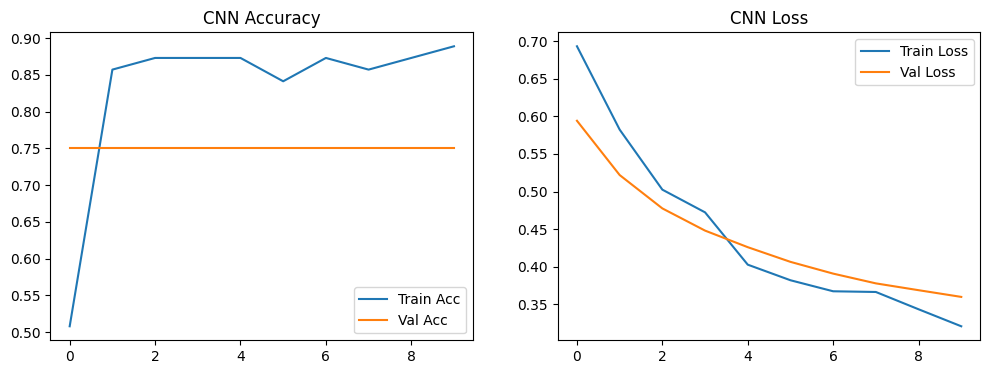

In [ ]:
# CNN Model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_history = cnn_model.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# CNN Evaluation
cnn_preds = (cnn_model.predict(X_test.reshape(-1, X_test.shape[1], 1)) > 0.5).astype(int)
print("\nCNN Classification Report:")
print(classification_report(y_test, cnn_preds))
ConfusionMatrixDisplay(confusion_matrix(y_test, cnn_preds)).plot(cmap='Blues')
plt.title("Confusion Matrix for CNN")
plt.show()

# CNN Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Train Acc')
plt.plot(cnn_history.history['val_accuracy'], label='Val Acc')
plt.title('CNN Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Val Loss')
plt.title('CNN Loss')
plt.legend()
plt.show()

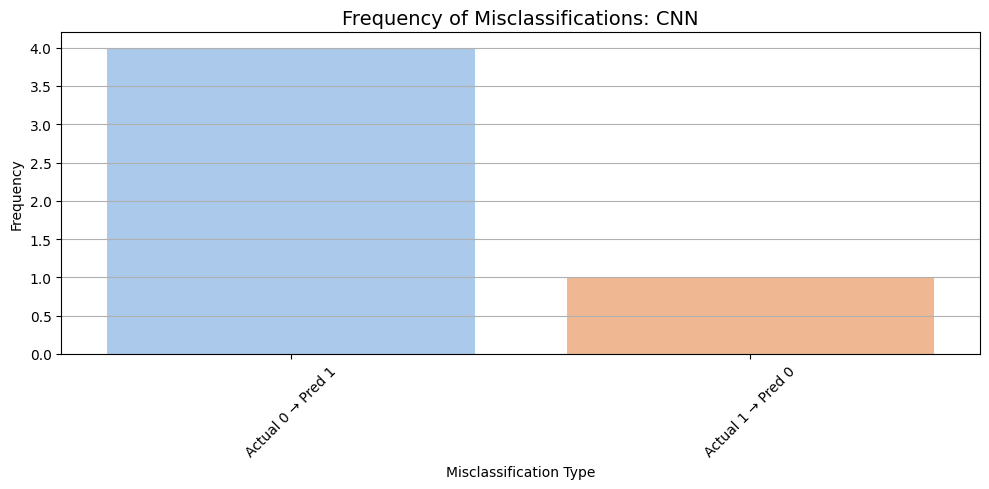

In [ ]:
plot_misclassification_frequency(y_test, cnn_preds.flatten(), "CNN")


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 596ms/step - accuracy: 0.5574 - loss: 0.6911 - val_accuracy: 0.8750 - val_loss: 0.6546
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.6319 - loss: 0.6685 - val_accuracy: 0.8750 - val_loss: 0.6317
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8419 - loss: 0.6439 - val_accuracy: 0.8750 - val_loss: 0.6102
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.8317 - loss: 0.6364 - val_accuracy: 0.8750 - val_loss: 0.5864
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.8421 - loss: 0.5932 - val_accuracy: 0.8750 - val_loss: 0.5603
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8841 - loss: 0.5797 - val_accuracy: 0.8125 - val_loss: 0.5335
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7688 - loss: 0.5698 - val_accuracy: 0.8125 - val_loss: 0.5058
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.8525 - loss: 0.5147 - val_accuracy: 0.8125 - val_loss: 0.4

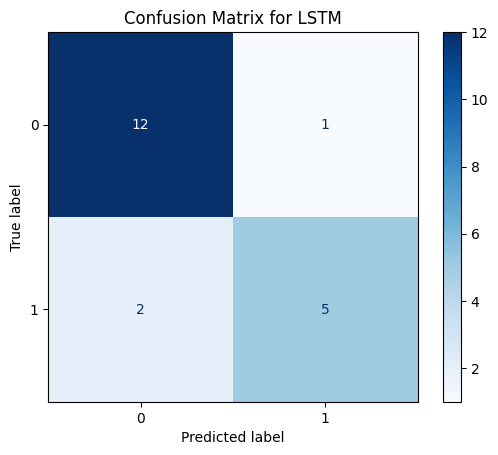

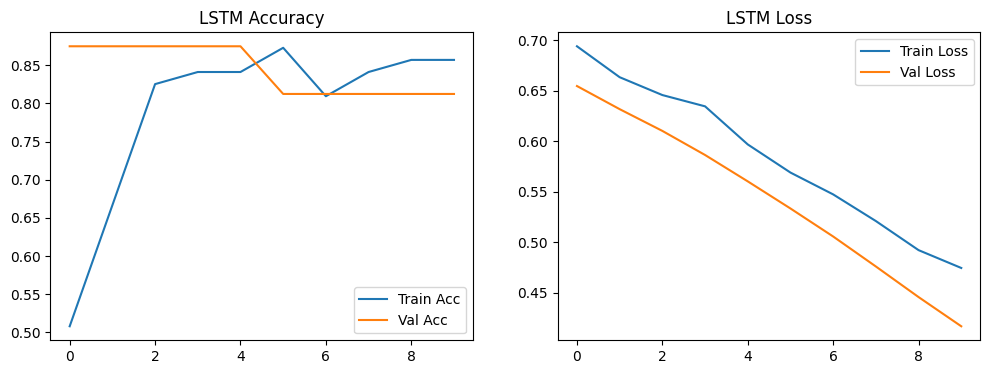

In [ ]:
# LSTM Model
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(32),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_history = lstm_model.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# LSTM Evaluation
lstm_preds = (lstm_model.predict(X_test.reshape(-1, X_test.shape[1], 1)) > 0.5).astype(int)
print("\nLSTM Classification Report:")
print(classification_report(y_test, lstm_preds))
ConfusionMatrixDisplay(confusion_matrix(y_test, lstm_preds)).plot(cmap='Blues')
plt.title("Confusion Matrix for LSTM")
plt.show()

# LSTM Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='Train Acc')
plt.plot(lstm_history.history['val_accuracy'], label='Val Acc')
plt.title('LSTM Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'], label='Train Loss')
plt.plot(lstm_history.history['val_loss'], label='Val Loss')
plt.title('LSTM Loss')
plt.legend()
plt.show()


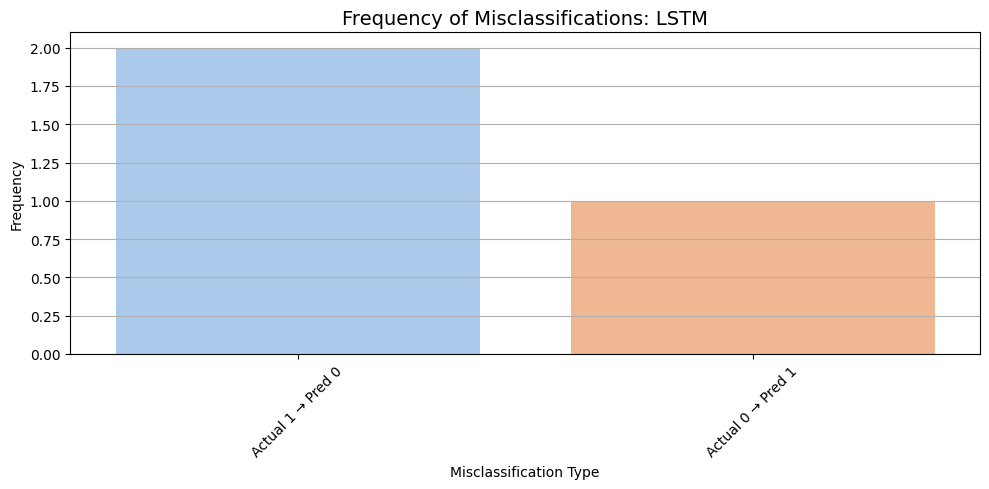

In [ ]:
plot_misclassification_frequency(y_test, lstm_preds.flatten(), "LSTM")
